# Stability Trade Studies
We begin by creating the aircraft and setting it's mass/ moments of inertia

In [10]:
from aircraft_design.final_design.final_construction import Aircraft
from aircraft_design.analysis.mass_analysis import MassAnalysis, MassFeature
import copy
from pprint import pprint

aircraft = Aircraft()


mass_lb = 593638.11
cg_x_in = 1564.92
cg_y_in = 9.6*12 #manually putting it in the center of the fuselage
cg_z_in = 47.36
ixx_lb_in2 = 212736172139.67
iyy_lb_in2 = 246202971831.78
ixy_lb_in2 = -12959690121.01
izz_lb_in2 = 438603644676.52
ixz_lb_in2 = -38390789.33
iyz_lb_in2 = -59355069.59

overall_mass_feature = MassFeature(
            mass=mass_lb,
            center_of_gravity=[cg_x_in / 12, cg_y_in / 12, cg_z_in / 12],
            ixx=ixx_lb_in2 / 144,
            iyy=iyy_lb_in2 / 144,
            izz=izz_lb_in2 / 144,
            ixy=ixy_lb_in2 / 144,
            ixz=ixz_lb_in2 / 144,
            iyz=iyz_lb_in2 / 144
        )

aircraft.add_feature(overall_mass_feature)
aircraft.add_analysis(MassAnalysis())

# Add a point mass component at the back of the plane
from aircraft_design.core.base import Component
from aircraft_design.analysis.mass_analysis import MassFeature

# Create point mass component
point_mass = Component(name="point_mass")

# Create mass feature at back of fuselage
back_mass = 30000  # lbs
back_position = [250, 0, 0] 
back_mass_feature = MassFeature(
    mass=back_mass,
    center_of_gravity=back_position
)
from aircraft_design.core.base import Position
back_mass_feature.position = Position(x=back_position[0], y=back_position[1], z=back_position[2])

# Add mass feature to point mass component
point_mass.add_feature(back_mass_feature)
point_mass.add_analysis(MassAnalysis())

# Add point mass component to aircraft
#aircraft.add_child(point_mass)




In [11]:
from aircraft_design.final_design.final_construction import Aircraft
from aircraft_design.analysis.mass_analysis import MassAnalysis, MassFeature
import copy
from pprint import pprint

aircraft = Aircraft()


In [12]:


empty_aircraft = copy.deepcopy(aircraft)
from aircraft_design.components.propulsion.fuel_tanks import FuelTank
# for each of the fuel tanks, set the fill level to 0
for tank in empty_aircraft.wing.children:
    if isinstance(tank, FuelTank):
        tank.set_fill_level(0)
for tank in empty_aircraft.horizontal_tail.children:
    if isinstance(tank, FuelTank):
        tank.set_fill_level(0)
for tank in empty_aircraft.vertical_tail.children:
    if isinstance(tank, FuelTank):
        tank.set_fill_level(0)


# print total aircraft mass
full_mass_test_aircraft = copy.deepcopy(aircraft)
full_mass_test_aircraft.run_analysis('mass_analysis', analyze_children=True)
full_mass_results = full_mass_test_aircraft.analysis_results['mass_analysis']
total_mass = full_mass_results['total_mass']
total_x_cg = full_mass_results['cg_x']
print(f"Total aircraft mass: {total_mass:.2f} lb")
print(f"Total aircraft x CG: {total_x_cg:.2f} ft")

empty_mass_test_aircraft = copy.deepcopy(empty_aircraft)
empty_mass_test_aircraft.run_analysis('mass_analysis', analyze_children=True)
empty_mass_results = empty_mass_test_aircraft.analysis_results['mass_analysis']
total_mass = empty_mass_results['total_mass']
total_x_cg = empty_mass_results['cg_x']
print(f"Total aircraft mass: {total_mass:.2f} lb")
print(f"Total aircraft x CG: {total_x_cg:.2f} ft")


Total aircraft mass: 1489799.35 lb
Total aircraft x CG: 135.26 ft
Total aircraft mass: 888640.39 lb
Total aircraft x CG: 145.27 ft


In [13]:


# Change to root directory to ensure plots are saved in the correct location
import os
current_dir = os.getcwd()
# Find the root directory by looking for .git folder
root_dir = current_dir
while not os.path.exists(os.path.join(root_dir, '.git')) and root_dir != '/':
    root_dir = os.path.dirname(root_dir)
    
# Change to root directory if found, otherwise stay in current directory
if os.path.exists(os.path.join(root_dir, '.git')):
    os.chdir(root_dir)
    print(f"Changed working directory to: {root_dir}")
else:
    print(f"Staying in current directory: {current_dir}")



Changed working directory to: /home/dryogurt/Documents/Habitats/Aero-Design-Team-Gamma


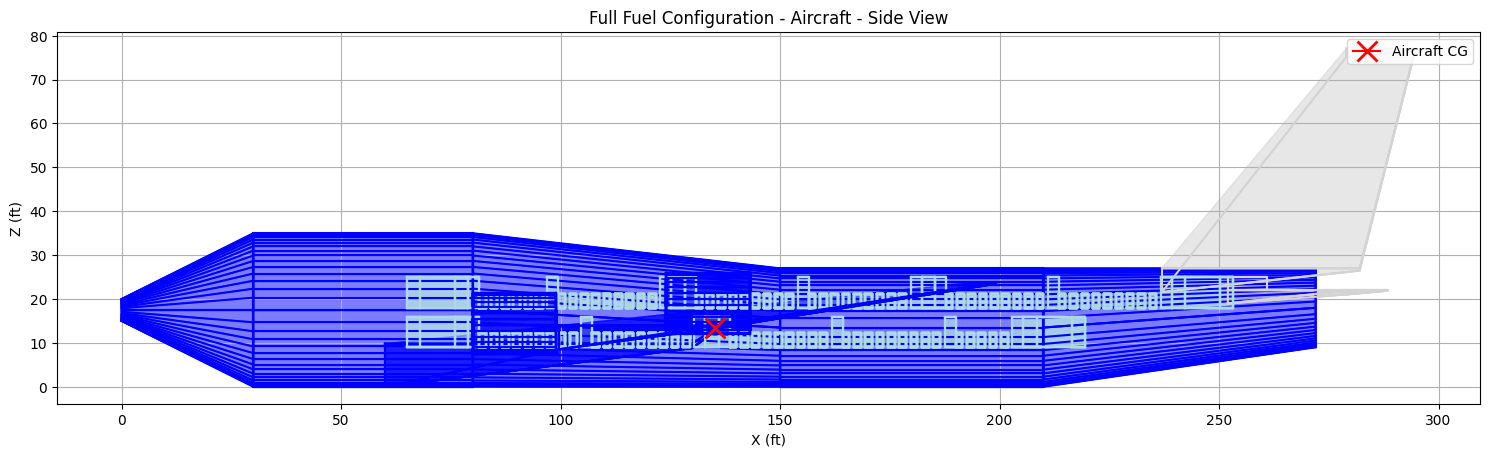

KeyboardInterrupt: 

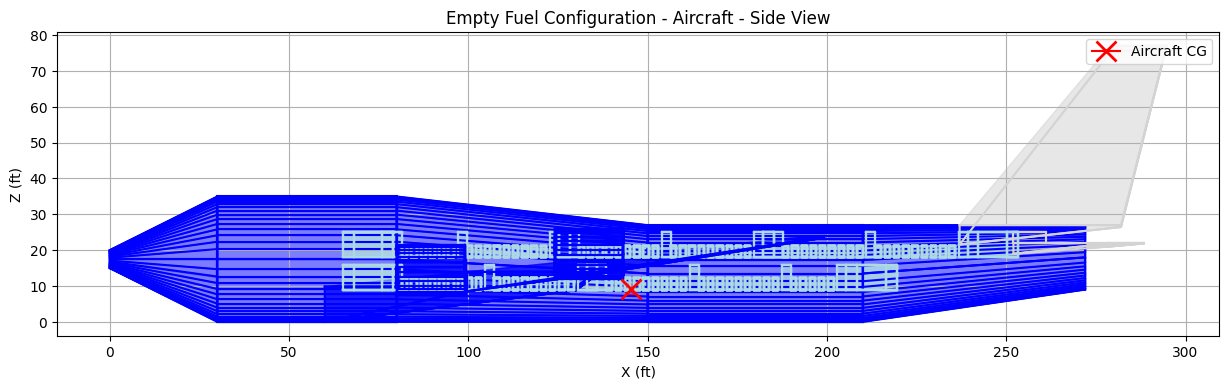

In [14]:
import matplotlib.pyplot as plt
from aircraft_design.core.plotting import plot_side_view, plot_cg

full_aircraft_mass_props = full_mass_results
empty_aircraft_mass_props = empty_mass_results

for aircraft,mass_props,fuel_config in [(aircraft,full_aircraft_mass_props,'Full'), (empty_aircraft,empty_aircraft_mass_props,'Empty')]:
    obj = aircraft.plot()
    # Side view
    fig_side = plt.figure(figsize=(15, 6))
    ax = fig_side.add_subplot(111)
    _, ax = plot_side_view(obj, fig=fig_side, ax=ax)
    plot_cg(ax, mass_props['cg_x'], mass_props['cg_z'], 
            color='red', markersize=15, label='Aircraft CG')

    ax.set_title(f"{fuel_config} Fuel Configuration - Aircraft - Side View")
    ax.set_aspect('equal')
    ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

In [7]:
# print mass properties
for mass_props in [full_aircraft_mass_props,empty_aircraft_mass_props]:
    pprint(f"Mass properties: {mass_props}")

("Mass properties: {'total_mass': 1489799.35, 'cg_x': 135.2564339549148, "
 "'cg_y': 5.68798011445859, 'cg_z': 13.40022878624002, 'total_ixx': "
 "3687123670.2615047, 'total_iyy': 1964336986.7767591, 'total_izz': "
 "5508030865.830694, 'total_ixy': -102664631.5438889, 'total_ixz': "
 "-36543643.658750005, 'total_iyz': -39802.286736111106}")
("Mass properties: {'total_mass': 888640.39, 'cg_x': 145.27460331073854, "
 "'cg_y': 9.232023628065491, 'cg_z': 9.040959257986987, 'total_ixx': "
 "1233982955.7042823, 'total_iyy': 1656255555.694537, 'total_izz': "
 "2757333857.0099998, 'total_ixy': -102617662.53083333, 'total_ixz': "
 "-8171.054236111111, 'total_iyz': -35509.09444444444}")


## Static Stability
This trade study calculates and returns some important static stability values. Since we're manually setting the mass, run this twice with/without fuel in the mass estimates and assume we can keep the CG close enough

In [ ]:
from aircraft_design.final_design.final_trade_studies.static_stability_trade_study import analyze_aircraft_static_stability
from aircraft_design.final_design.final_trade_studies.static_margin_analysis import static_margin_at_full_and_empty
# copy aircraft
aircraft_static_stability_copy = copy.deepcopy(aircraft)

aircraft_params, analysis_results = analyze_aircraft_static_stability(empty_aircraft
                                                                      ,landing_configuration=False)

full_static_margin, empty_static_margin, full_cg_position, empty_cg_position = static_margin_at_full_and_empty(aircraft)
print(f"Full fuel static margin: {full_static_margin:.2f}")
print(f"Empty fuel static margin: {empty_static_margin:.2f}")
print(f"Full fuel CG position: {full_cg_position:.2f} ft")
print(f"Empty fuel CG position: {empty_cg_position:.2f} ft")

pprint(analysis_results['stability_analyses'])

/home/dryogurt/Documents/Habitats/Aero-Design-Team-Gamma/aircraft_design/analysis/static_stability.py:789: RuntimeWarning: invalid value encountered in scalar divide
  'Cl_delta_a': Cl_delta_a/delta_a,  # Derivative


{'CD_0': 0.017,
 'CD_alpha': 0.20529316136975276,
 'CD_total': 0.04423111614274965,
 'CL_0': -0.11350352744699038,
 'CL_alpha': 5.40451677525609,
 'CL_total': 0.6033787253298968,
 'CM_0': 0.16110108477230267,
 'CM_alpha': -2.6460944334157412,
 'CM_total': -0.1898901726093663,
 'VH': 0.2750802019522218,
 'h_n': 1.3611979902091318,
 'it': 0.2521250000000002,
 'static_margin': 0.48960796005492235}
Full fuel static margin: 0.49
Empty fuel static margin: 0.49
Full fuel CG position: 145.27 ft
Empty fuel CG position: 145.27 ft
{'directional_stability': {'CN_beta': 0.6916717967956416,
                           'V_v': 0.04507095195528292,
                           'weathercock_stability': True},
 'engine_out': {'CN_delta_r': -0.10705766173745887,
                'engine_out_yaw_moment': 2804550.0,
                'required_rudder_deflection': -0.007062727572837497,
                'rudder_margin': 98.38134207290294,
                'rudder_sufficient': True},
 'lateral_control': {'Cl_delta_a'

## Dynamic Stability - Dimensionless Params
This trade study calculates the dimensionless derivatives for dynamic stability, and calculates the steady roll rate (which should be at least 0.6.

In [9]:
from aircraft_design.final_design.final_trade_studies.dynamic_stability_trade_study import create_stability_parameters
from ambiance import Atmosphere
import numbers
flight_conditions = [
    # M, h
    (0.25, 0),
    (0.5,20e3),
    (0.5,36e3),
    (0.9,40e3)
]
flight_conditions_stability_params = []
for M, h in flight_conditions:
    rho = Atmosphere(h).density
    a = Atmosphere(h).speed_of_sound
    V0 = M * a
    flight_conditions_stability_params.append((V0,rho))

aircraft_dynamic_stability_copy = copy.deepcopy(aircraft)
all_dimensionless_derivatives = {}
for rho, V0 in flight_conditions_stability_params:  
    aircraft_params, stability_params, dimensionless_derivatives = create_stability_parameters(aircraft_dynamic_stability_copy, rho=rho, V0=V0)
    for key, value in dimensionless_derivatives.items():
        if key in all_dimensionless_derivatives:
            all_dimensionless_derivatives[key].append(value if isinstance(value, numbers.Number) else value[0])
        else:
            all_dimensionless_derivatives[key] = [value] if isinstance(value, numbers.Number) else list(value)
    dimensionless_roll_rate = dimensionless_derivatives['C_l_delta_a'] / dimensionless_derivatives['C_l_p']
    steady_roll_rate = dimensionless_roll_rate * 2 * aircraft_params['airspeed'] / aircraft_params['wingspan']
    if 'steady_roll_rate' in all_dimensionless_derivatives:
        all_dimensionless_derivatives['steady_roll_rate'].append(steady_roll_rate)
    else:
        all_dimensionless_derivatives['steady_roll_rate'] = [steady_roll_rate]

pprint(all_dimensionless_derivatives)

for key, values in dimensionless_derivatives.items():
    print(f"{key}: {', '.join(f'{v:.3f}' for v in values)}")


{'C_M_alpha': [-2.6460944334157412,
               -2.6460944334157412,
               -2.6460944334157412,
               -2.6460944334157412],
 'C_M_alpha_dot': [-1.8973007261672692,
                   -1.8973007261672692,
                   -1.8973007261672692,
                   -1.8973007261672692],
 'C_M_delta': [-0.38575435074367787,
               -0.38575435074367787,
               -0.38575435074367787,
               -0.38575435074367787],
 'C_M_q': [-4.856961208566961,
           -4.856961208566961,
           -4.856961208566961,
           -4.856961208566961],
 'C_M_u': [0.0, 0.0, 0.0, 0.0],
 'C_N_beta': [0.180584381111092,
              0.180584381111092,
              0.180584381111092,
              0.180584381111092],
 'C_N_delta_a': [0.009074728150197248,
                 0.009074728150197248,
                 0.009074728150197248,
                 0.009074728150197248],
 'C_N_delta_r': [-0.0632045333888822,
                 -0.0632045333888822,
                 -0.06

TypeError: 'numpy.float64' object is not iterable

## Dynamic Stability - Frequencies, Damping Ratios and Time Constants
This trade study calculates and returns all the values for ensuring first order dynamic stability 

In [15]:
from aircraft_design.final_design.final_trade_studies.dynamic_stability_trade_study import analyze_aircraft_dynamic_stability, plot_gain_sensitivity

aircraft_dynamic_stability_copy = copy.deepcopy(aircraft)



# find passive values
short_nf, short_df, p_nf, p_df, dnf, ddr, Tr, Ts = analyze_aircraft_dynamic_stability(aircraft_dynamic_stability_copy, visualize=False)

print(f"====== Passive values ====== \n short_nf: {short_nf:.2f}, short_df: {short_df:.2f}, p_nf: {p_nf:.2f}, p_df: {p_df:.2f}, dnf: {dnf:.2f}, ddr: {ddr:.2f}, Tr: {Tr:.2f}, Ts: {Ts:.2f}")

# currently these gains are bad
test_gains = {
        'ku': [0.0, -0.1], 'kw': [0, -.1], 'kq': [0, 0], 'ko_long': [0, 0],
        'kv': [0.3, 0], 'kp': [-0.5, 0.5], 'kr': [-0.5, 0.5], 'ko_lat': [-0.5, 0.5]
    }
# find augmented values
short_nf, short_df, p_nf, p_df, dnf, ddr, Tr, Ts = analyze_aircraft_dynamic_stability(aircraft_dynamic_stability_copy, **test_gains, visualize=False)
print(f"====== Augmented values ====== \n short_nf: {short_nf:.2f}, short_df: {short_df:.2f}, p_nf: {p_nf:.2f}, p_df: {p_df:.2f}, dnf: {dnf:.2f}, ddr: {ddr:.2f}, Tr: {Tr:.2f}, Ts: {Ts:.2f}")



# plot long gain sensitivity
for gain in []:#['ku', 'kw', 'kq', 'ko_long']:
    plot_gain_sensitivity(aircraft_dynamic_stability_copy, gain, base_gains=test_gains)
    print(f"Finished {gain}")

#plot lat gain sensitivity
for gain in ['kv', 'kp', 'kr', 'ko_lat']:
    plot_gain_sensitivity(aircraft_dynamic_stability_copy, gain, base_gains=test_gains)
    print(f"Finished {gain}")

/home/dryogurt/Documents/Habitats/Aero-Design-Team-Gamma/aircraft_design/analysis/static_stability.py:790: RuntimeWarning: invalid value encountered in scalar divide
  'Cl_delta_a': Cl_delta_a/delta_a,  # Derivative
/home/dryogurt/.cache/pypoetry/virtualenvs/aerospace-design-team-gamma-QogS2DLM-py3.13/lib/python3.13/site-packages/scipy/signal/_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


====== Passive values ====== 
 short_nf: 1.14, short_df: 0.04, p_nf: 0.01, p_df: 0.01, dnf: 0.37, ddr: -0.05, Tr: 4.64, Ts: 117.53
====== Augmented values ====== 
 short_nf: 1.14, short_df: 0.04, p_nf: 0.01, p_df: 6.56, dnf: 1.17, ddr: 0.64, Tr: nan, Ts: nan


/home/dryogurt/.cache/pypoetry/virtualenvs/aerospace-design-team-gamma-QogS2DLM-py3.13/lib/python3.13/site-packages/scipy/signal/_ltisys.py:1948: RuntimeWarning: overflow encountered in matmul
  xout[i] = xout[i-1] @ Ad + U[i-1] @ Bd
/home/dryogurt/.cache/pypoetry/virtualenvs/aerospace-design-team-gamma-QogS2DLM-py3.13/lib/python3.13/site-packages/scipy/signal/_ltisys.py:1972: RuntimeWarning: invalid value encountered in matmul
  yout = squeeze(xout @ C.T) + squeeze(U @ D.T)
/home/dryogurt/Documents/Habitats/Aero-Design-Team-Gamma/aircraft_design/analysis/lateral.py:324: RuntimeWarning: invalid value encountered in add
  p = p_xi + p_zeta
/home/dryogurt/Documents/Habitats/Aero-Design-Team-Gamma/aircraft_design/analysis/lateral.py:328: RuntimeWarning: invalid value encountered in add
  r = r_xi + r_zeta
/home/dryogurt/.cache/pypoetry/virtualenvs/aerospace-design-team-gamma-QogS2DLM-py3.13/lib/python3.13/site-packages/scipy/signal/_ltisys.py:1972: RuntimeWarning: overflow encountered in 

Finished kv
Finished kp
Finished kr
Finished ko_lat


In [12]:
import json
import os
from typing import List, Dict, Any
from pprint import pprint

def get_best_solutions(
    solutions_dir: str,
    best_longitudinal: int,
    best_lateral: int
) -> Dict[str, List[Dict[str, Any]]]:
    """
    Extract the n best longitudinal and m best lateral solutions based on cost.
    
    Args:
        solutions_dir: Path to the directory containing solution files
        n_longitudinal: Number of best longitudinal solutions to return
        m_lateral: Number of best lateral solutions to return
        
    Returns:
        Dictionary with two keys:
        - 'longitudinal': List of n best longitudinal solutions
        - 'lateral': List of m best lateral solutions
    """
    longitudinal_solutions = []
    lateral_solutions = []
    
    # Read all solution files
    for filename in os.listdir(solutions_dir):
        if not filename.endswith('.json'):
            continue
            
        filepath = os.path.join(solutions_dir, filename)
        with open(filepath, 'r') as f:
            solution = json.load(f)
            
        # Add solution to appropriate list
        if 'longitudinal' in filename:
            longitudinal_solutions.append(solution)
        elif 'lateral' in filename:
            lateral_solutions.append(solution)
    
    # Filter longitudinal solutions to only include those with short_nf < 5
    longitudinal_solutions = [sol for sol in longitudinal_solutions if sol['results']['short_nf'] < 5]
    
    # Sort solutions by p_nf (descending)
    longitudinal_solutions.sort(key=lambda x: -x['results']['p_nf'])
    lateral_solutions.sort(key=lambda x: x['cost'])
    
    return {
        'longitudinal': longitudinal_solutions[:best_longitudinal],
        'lateral': lateral_solutions[:best_lateral]
    }

best_solutions = get_best_solutions(
    solutions_dir='assets/dynamic_stability/solutions',
    best_longitudinal=25,  # Get 5 best longitudinal solutions
    best_lateral=5        # Get 5 best lateral solutions
)

# Access the solutions
best_longitudinal = best_solutions['longitudinal']
best_lateral = best_solutions['lateral']

for i in range(len(best_longitudinal)):
    pprint(best_longitudinal[i])
for i in range(len(best_lateral)):
    pprint(best_lateral[i])

{'cost': 1.6132835591347798,
 'gains': {'ko_long': [-1.106557361589127, -2.716726722200793],
           'kq': [-3.7653090373655735, 0.01030584328541373],
           'ku': [-0.1867351906165846, -0.21052538147505695],
           'kw': [0.16259379032431331, -2.081501800348712]},
 'results': {'p_df': 0.0,
             'p_nf': 0.0,
             'short_df': 0.8238022054866027,
             'short_nf': 3.712213267689081}}
{'cost': 1.7890884800781552,
 'gains': {'ko_long': [0.5612024556720367, -0.9368415279902211],
           'kq': [-4.93454210174951, 0.03064010221233371],
           'ku': [-0.7541597868695018, -0.37649500213385334],
           'kw': [-0.13768260936998922, -0.3802678576839611]},
 'results': {'p_df': 0.0,
             'p_nf': 0.0,
             'short_df': 0.3122175382040119,
             'short_nf': 4.902037633054767}}
{'cost': 1.4731516084860554,
 'gains': {'ko_long': [0.6216218132260711, -2.8138323141930357],
           'kq': [-0.29574272983740957, -0.1874638771203263],
     

Aircraft Longitudinal Dynamics

  1004.8 :V0 (ft/s) level cruise
 --- longitudinal aerodynamic stability derivatives ---
     -0.00034   -0.00466    0.00000    0.00000
      0.00307   -0.04285   -0.00109    0.00000
    -45.58096 1003.13214   -0.05653    1.00000
    -32.17399   -0.02548   -0.00000    0.00000
 --- control derivatives ---
     -0.11591    0.00000
     -1.38349    0.00000
     -0.12250    0.00000
      0.00000    0.00000
 --- time array --- 
  0 0.01 30 :i.e. t=(0:0.01:30)
 --- step inputs ---
       0.1745 :elevator deflection, eta (rad) [1 deg = 0.0175 rad]
       1.0000 :engine thrust increment, tau
 --- feedback control ---
   -0.1     1.2  :axial velocity gains (eta tau)
    0.0    -2.3  :normal velocity gains
    2.9    -0.6  :pitch rate gains
    0.4    -1.1  :pitch attitude gains
 --- end ---

[A]:
  1.5908e+00 -4.6564e-03 -1.7677e-02 -3.3632e+01
 -3.1080e+00 -4.2848e-02  4.3520e-03 -2.5477e-02
 -4.6127e+01  1.0031e+03  3.0438e-01  5.2107e-02
  0.0000e+00  0.0000e+

/home/dryogurt/Documents/Habitats/Aero-Design-Team-Gamma/aircraft_design/analysis/longitudinal.py:137: RuntimeWarning: invalid value encountered in sqrt
  snfa = np.sqrt(c12)
/home/dryogurt/.cache/pypoetry/virtualenvs/aerospace-design-team-gamma-QogS2DLM-py3.13/lib/python3.13/site-packages/scipy/signal/_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


Steady-State Respones:
 -1.5560e+00 :Axial Velocity
  2.5150e-01 :Normal Velocity
  0.0000e+00 :Pitch Rate
 -1.3858e-01 :Pitch Angle
  2.5029e-04 :Angle-of-Attack
 -1.3883e-01 :Flight Path Angle
Aircraft Lateral-Directional Dynamics

  1004.8 :V0 (ft/s) level cruise
 --- lateral-directional aerodynamic stability derivatives ---
     -0.00488   -0.00047    0.00014    0.00000
     -0.12647   -0.15799   -0.00654    1.00000
   -1003.52246    0.05984   -0.04607    0.00079
     32.17399    0.00000    0.00000    0.00000
 --- control derivatives ---
      0.00000    1.71555
     -0.17268    0.00989
      0.00115   -0.04727
      0.00000    0.00000
 --- time array --- 
  0 0.01 30 :i.e. t=(0:0.01:30)
 --- step inputs ---
       0.0000 :aileron deflection, xi (rad) [1 deg = 0.0175 rad]
       0.0000 :rudder deflection, zeta (rad)
 --- feedback control ---
    0.0     0.0  :lateral velocity gains (aileron rudder)
    0.0     0.0  :roll rate gains
    0.0     0.0  :yaw rate gains
    0.0     0.0  

/home/dryogurt/.cache/pypoetry/virtualenvs/aerospace-design-team-gamma-QogS2DLM-py3.13/lib/python3.13/site-packages/scipy/signal/_lti_conversion.py:74: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  num, den = normalize(num, den)   # Strips zeros, checks arrays


Steady-State Responses:
 -0.0000e+00 :Lateral Velocity
  0.0000e+00 :Roll Rate
 -0.0000e+00 :Yaw Rate
 -0.0000e+00 :Roll Angle
 -0.0000e+00 :Sideslip Angle


(3.1571370592278405,
 0.480197066289561,
 0.0,
 0.0,
 0.39507685948423327,
 -0.06107649077205414,
 4.0659532023313245,
 88.88614569816879)

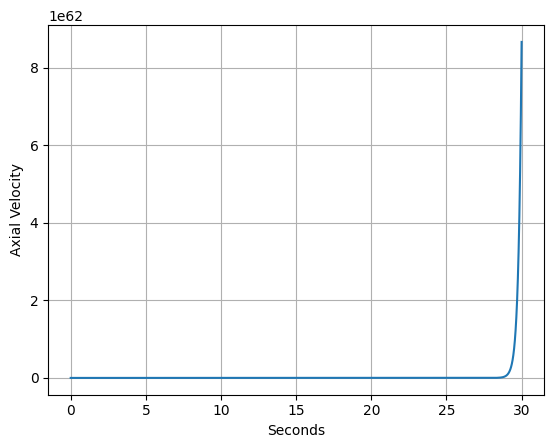

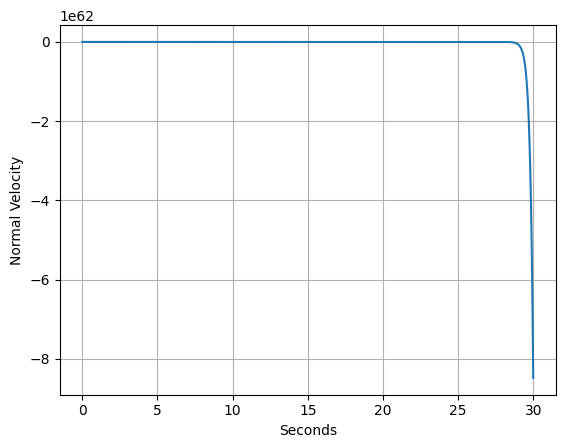

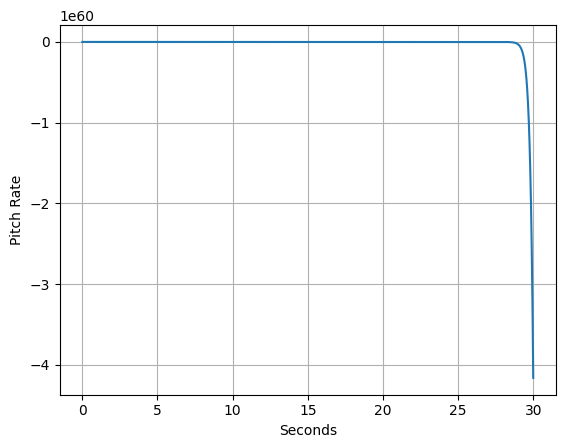

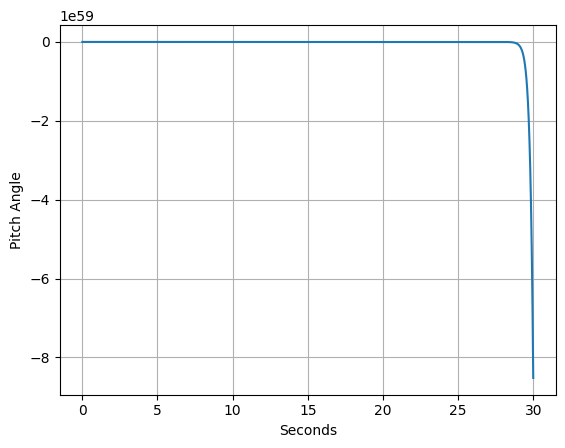

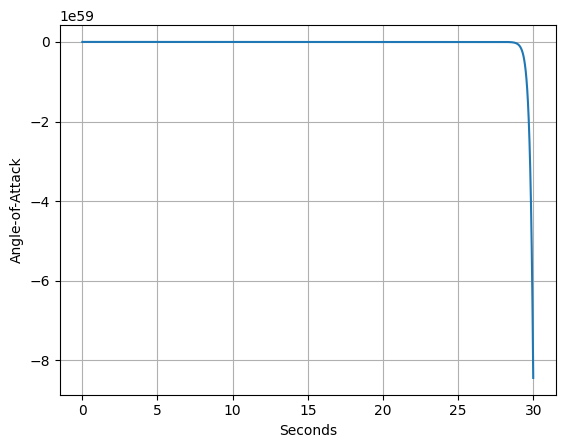

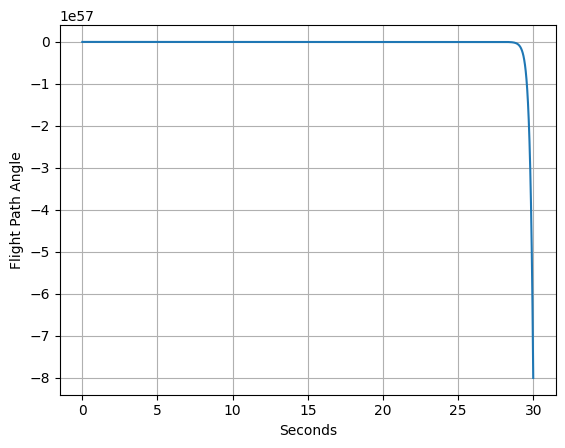

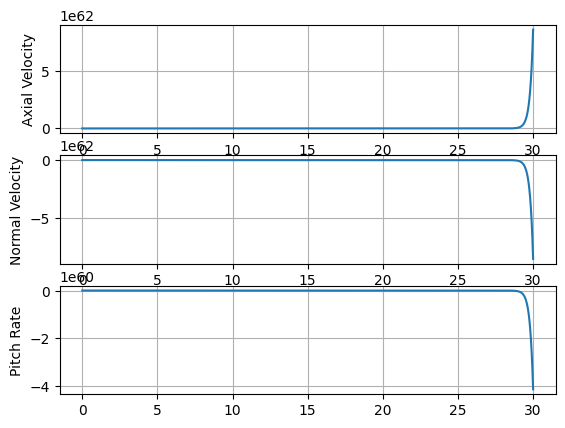

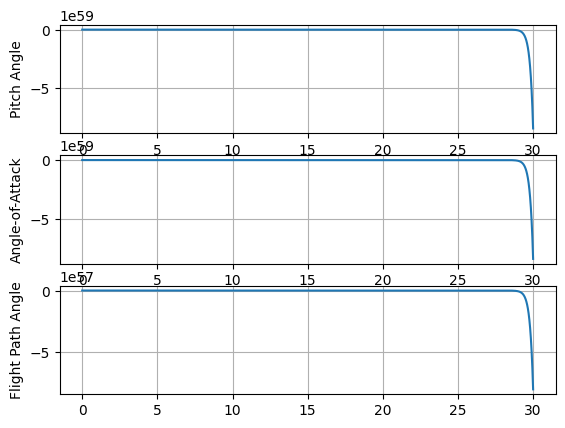

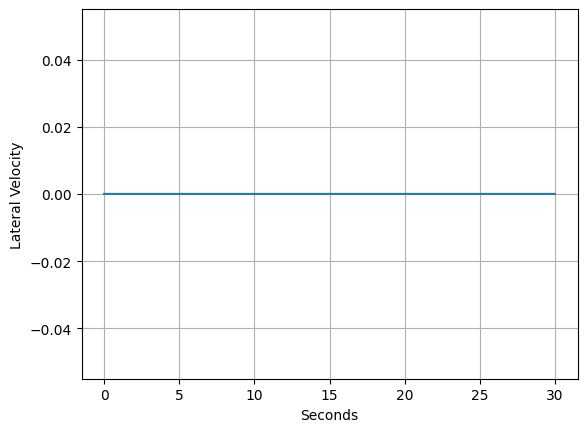

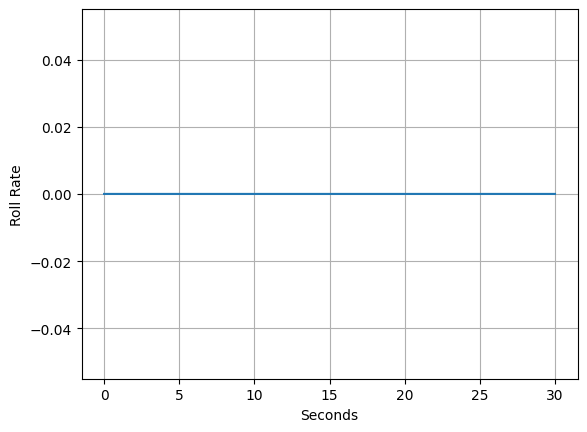

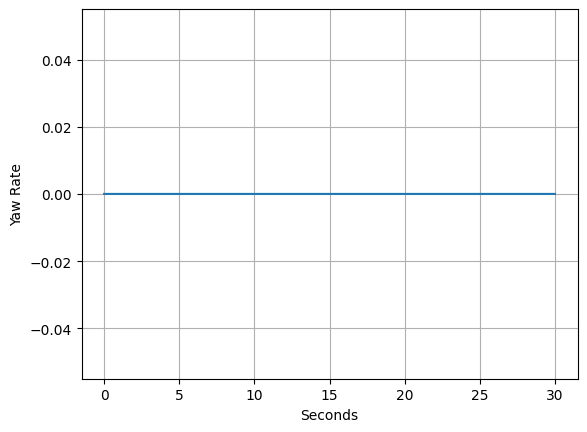

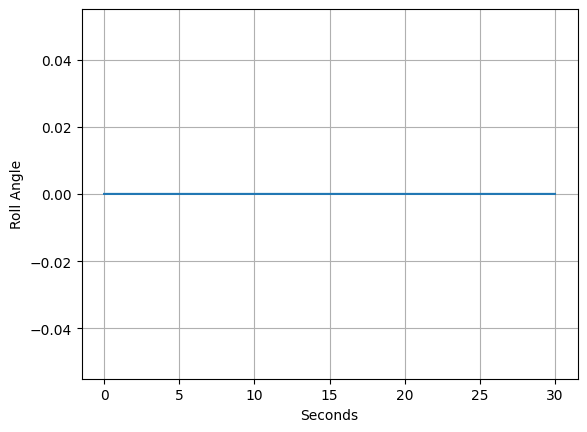

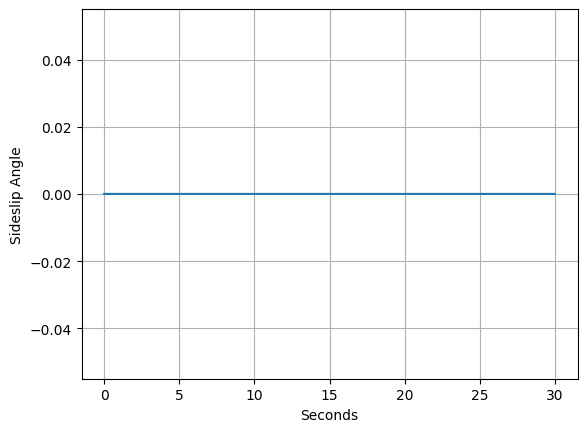

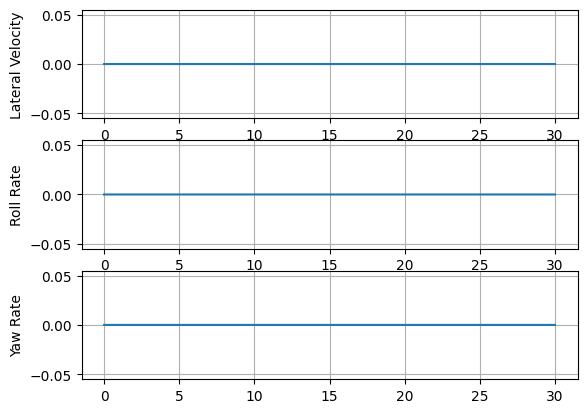

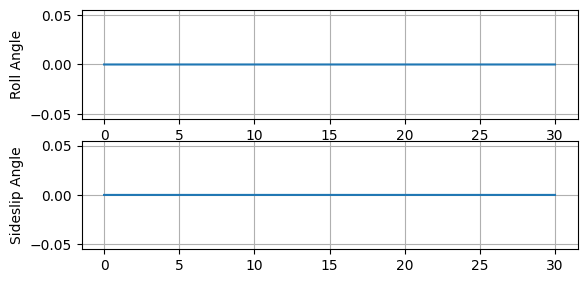

In [7]:
from aircraft_design.final_design.final_trade_studies.dynamic_stability_trade_study import analyze_aircraft_dynamic_stability
from aircraft_design.final_design.final_construction import Aircraft
import numpy as np
# prepare for optimization
aircraft = Aircraft()
test_gains = {'ko_long': [0.4253810369570412, -1.0895938907733194],
           'kq': [2.9463312437697606, -0.641640554927314],
           'ku': [-0.1443077700100025, 1.1621887321320818],
           'kw': [0.044401442882121556, -2.2524414223174922],
           }

base_gains_lon = [test_gains['ku'][0], test_gains['ku'][1], test_gains['kw'][0], test_gains['kw'][1], test_gains['kq'][0], test_gains['kq'][1], test_gains['ko_long'][0], test_gains['ko_long'][1]]
base_gains_lat = np.zeros(8) #[test_gains['kv'][0], test_gains['kv'][1], test_gains['kp'][0], test_gains['kp'][1], test_gains['kr'][0], test_gains['kr'][1], test_gains['ko_lat'][0], test_gains['ko_lat'][1]]


analyze_aircraft_dynamic_stability(aircraft, **test_gains, visualize=True)



/home/dryogurt/Documents/Habitats/Aero-Design-Team-Gamma/aircraft_design/analysis/static_stability.py:789: RuntimeWarning: invalid value encountered in scalar divide
  'Cl_delta_a': Cl_delta_a/delta_a,  # Derivative


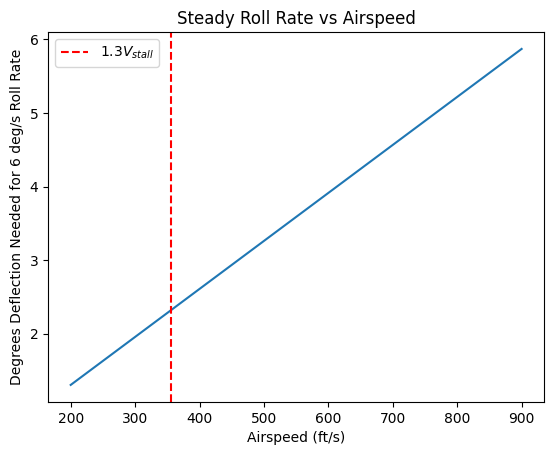

In [18]:
import matplotlib.pyplot as plt
aircraft_params, stability_params, dimensionless_derivatives = create_stability_parameters(aircraft_dynamic_stability_copy, rho=rho, V0=V0)

dimensionless_roll_rate = dimensionless_derivatives['C_l_delta_a'] / dimensionless_derivatives['C_l_p']
V0s = np.linspace(200,900,20)
rho = Atmosphere(36000/3.28084).density
steady_roll_rates = []
for V0 in V0s:
    steady_roll_rate = dimensionless_roll_rate * 2 * V0 / 315
    steady_roll_rates.append(steady_roll_rate*6)

plt.plot(V0s, steady_roll_rates)
plt.xlabel('Airspeed (ft/s)')
plt.ylabel('Degrees Deflection Needed for 6 deg/s Roll Rate')
plt.title('Steady Roll Rate vs Airspeed')
#draw a vertical line at 200 ft/s
plt.axvline(x=356.094, color='red', linestyle='--',label='$1.3 V_{stall}$')


plt.legend()
plt.show()

-0.0632045333888822
-0.0632045333888822
-0.0632045333888822
-0.0632045333888822
-0.0632045333888822
-0.0632045333888822
-0.0632045333888822
-0.0632045333888822
-0.0632045333888822
-0.0632045333888822
-0.0632045333888822
-0.0632045333888822
-0.0632045333888822
-0.0632045333888822
-0.0632045333888822
-0.0632045333888822
-0.0632045333888822
-0.0632045333888822
-0.0632045333888822
-0.0632045333888822


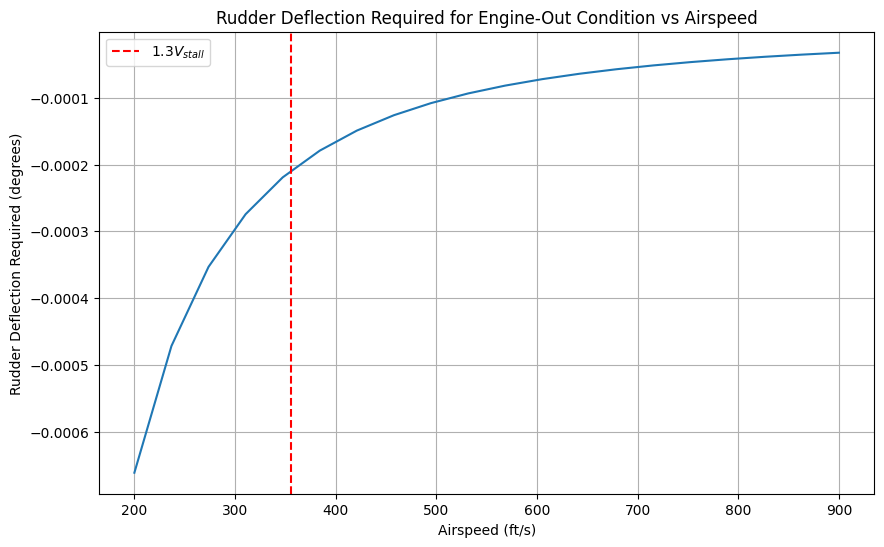

In [17]:
import numpy as np
# Extract relevant parameters from the aircraft
S = 9812.599#aircraft_params['wing_area']
b = 315 #aircraft_params['wingspan']

# Engine-out yawing moment (from previous calculation)
engine_moment = (48 + 2*48) * 89381.250  # Using the engine thrust defined above

# Calculate rudder deflection needed at different airspeeds
V0s = np.linspace(200, 900, 20)
rudder_deflections = []
rudder_deflections_degrees = []

for V0 in V0s:
    # Dynamic pressure
    q = 0.5 * rho * V0**2
    
    # Yaw moment coefficient due to rudder
    CN_delta_r = dimensionless_derivatives['C_N_delta_r']
    print(CN_delta_r)
    # Required rudder deflection
    delta_r = engine_moment / (q * S * b) / CN_delta_r
    
    rudder_deflections.append(delta_r)
    rudder_deflections_degrees.append(np.degrees(delta_r))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(V0s, rudder_deflections_degrees)
plt.xlabel('Airspeed (ft/s)')
plt.ylabel('Rudder Deflection Required (degrees)')
plt.title('Rudder Deflection Required for Engine-Out Condition vs Airspeed')
plt.axvline(x=356.094, color='red', linestyle='--', label='$1.3 V_{stall}$')

# Add horizontal line at maximum rudder deflection (if available)
if 'max_rudder_deflection' in aircraft_params:
    max_deflection_deg = np.degrees(aircraft_params['max_rudder_deflection'])
    #plt.axhline(y=max_deflection_deg, color='green', linestyle='--', 
    #            label=f'Max Rudder Deflection ({max_deflection_deg:.1f}°)')

plt.grid(True)
plt.legend()
plt.show()




/tmp/ipykernel_4056758/2760953559.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


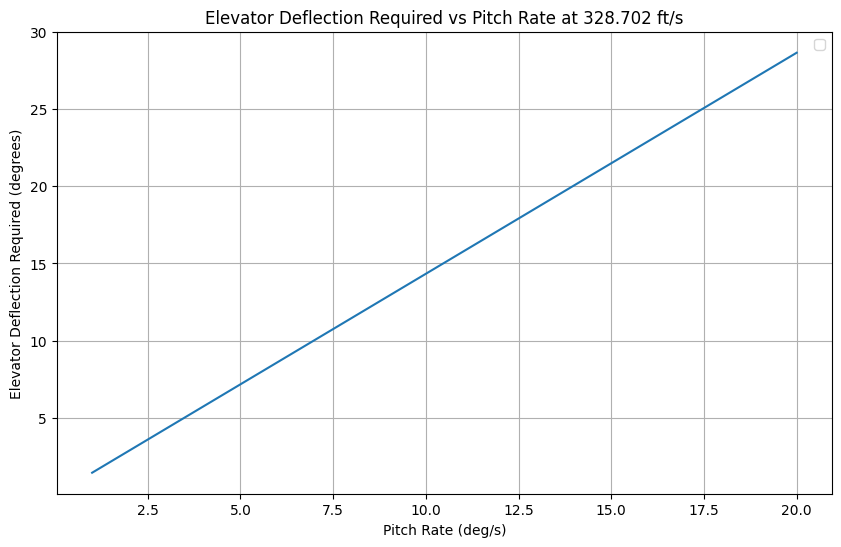

In [40]:
import numpy as np
# Extract relevant parameters from the aircraft
S = 9812.599#aircraft_params['wing_area']
b = 315 #aircraft_params['wingspan']
c = aircraft_params['mac']
V0s = np.linspace(200, 900, 20)
elevator_deflections = []
elevator_deflections_degrees = []
# Define a range of pitch rates to analyze (deg/s)
pitch_rates = np.linspace(1, 20, 20)  # From 1 to 20 deg/s
elevator_deflections = []
elevator_deflections_degrees = []

# Use a fixed airspeed (e.g., takeoff speed)
V0 = 328.702

# Get relevant coefficients
C_M_q = dimensionless_derivatives['C_M_q']
C_M_alpha = dimensionless_derivatives['C_M_alpha']
C_M_delta_e = dimensionless_derivatives['C_M_delta']

for pitch_rate_deg in pitch_rates:
    # Convert pitch rate from deg/s to rad/s
    pitch_rate_rad = np.radians(pitch_rate_deg)
    
    # Calculate required elevator deflection
    delta_e = (C_M_q + C_M_alpha) * pitch_rate_rad * c / (2 * V0) / C_M_delta_e
    
    elevator_deflections.append(delta_e)
    elevator_deflections_degrees.append(np.degrees(delta_e))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(pitch_rates, elevator_deflections_degrees)
plt.xlabel('Pitch Rate (deg/s)')
plt.ylabel('Elevator Deflection Required (degrees)')
plt.title(f'Elevator Deflection Required vs Pitch Rate at {V0} ft/s')

# Add horizontal line at maximum elevator deflection (if available)
if 'max_elevator_deflection' in aircraft_params:
    max_deflection_deg = np.degrees(aircraft_params['max_elevator_deflection'])
    plt.axhline(y=max_deflection_deg, color='green', linestyle='--', 
                label=f'Max Elevator Deflection ({max_deflection_deg:.1f}°)')

plt.grid(True)
plt.legend()
plt.show()




In [29]:
1400 / 328

4.2682926829268295